### **В данном ноутбуке приведен анализ данных постов из новостного сообщества**

#### Основные этапы:

- предобработка текстовых данных

- визуализация

- выбор метрики популярности поста и разделение данных на классы

- векторизация текстов

- разделение данных на обучающую и тестовую выборки

- обучение классификатора

- подбор гиперпараметров

- валидация на данных нового поста, не участвовавшего в обучении модели


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data_mod.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_group     50000 non-null  int64  
 1   id_post      50000 non-null  int64  
 2   date         50000 non-null  int64  
 3   description  0 non-null      float64
 4   title        0 non-null      float64
 5   text         46720 non-null  object 
 6   views        50000 non-null  int64  
 7   likes        50000 non-null  int64  
 8   reposts      50000 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 3.4+ MB


In [4]:
data

,id_group,id_post,date,description,title,text,views,likes,reposts
0,-24136539,9329980,1740675121,NaN,NaN,"ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...",4827,47,6
1,-24136539,9330068,1740679800,NaN,NaN,В абхазский город Сухум прибыла первая скорост...,402,2,0
2,-24136539,9330055,1740678636,NaN,NaN,Один человек пострадал в ДТП с автоцистерной н...,3487,14,3
3,-24136539,9330018,1740677400,NaN,NaN,Венгрия подняла на переговорах с США вопрос об...,3736,46,1
4,-24136539,9329988,1740675726,NaN,NaN,"США депортировали в Россию мужчину, который со...",7529,69,5
...,...,...,...,...,...,...,...,...,...
49995,-24136539,6554147,1651933200,NaN,NaN,⚡️Эксклюзив⚡️Корреспондент ВГТРК Станислав Бер...,25162,215,15
49996,-24136539,6554062,1651931700,NaN,NaN,"📻7 мая в России отмечают День радио. Событие, ...",20543,139,21
49997,-24136539,6553973,1651930279,NaN,NaN,Мэр Варшавы и МИД Польши выступили против пред...,29370,141,18
49998,-24136539,6553892,1651928970,NaN,NaN,Жители Читы почтили память павших в Великой От...,36311,437,13


In [5]:
data.drop(columns=['description', 'title'])

,id_group,id_post,date,text,views,likes,reposts
0,-24136539,9329980,1740675121,"ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...",4827,47,6
1,-24136539,9330068,1740679800,В абхазский город Сухум прибыла первая скорост...,402,2,0
2,-24136539,9330055,1740678636,Один человек пострадал в ДТП с автоцистерной н...,3487,14,3
3,-24136539,9330018,1740677400,Венгрия подняла на переговорах с США вопрос об...,3736,46,1
4,-24136539,9329988,1740675726,"США депортировали в Россию мужчину, который со...",7529,69,5
...,...,...,...,...,...,...,...
49995,-24136539,6554147,1651933200,⚡️Эксклюзив⚡️Корреспондент ВГТРК Станислав Бер...,25162,215,15
49996,-24136539,6554062,1651931700,"📻7 мая в России отмечают День радио. Событие, ...",20543,139,21
49997,-24136539,6553973,1651930279,Мэр Варшавы и МИД Польши выступили против пред...,29370,141,18
49998,-24136539,6553892,1651928970,Жители Читы почтили память павших в Великой От...,36311,437,13


### Предобработка текстовых данных

In [ ]:
# загрузка библиотек

In [6]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
pip install pymorphy3 > None

In [8]:
from pymorphy3 import MorphAnalyzer
morph = MorphAnalyzer()

In [ ]:
# пунктуация

In [9]:
from string import punctuation

In [10]:
punctuations = list(punctuation)

In [11]:
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [ ]:
# можно оставить скобочки, вопросительные, восклицательные знаки - пригодятся при анализе эмоциональной окраски постов

In [12]:
del_punctuations = ['!', '?', '(', ')']
new_punctuation = [el for el in punctuation if el not in del_punctuations]
print(new_punctuation)

['"', '#', '$', '%', '&', "'", '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [ ]:
# убрать смайлики

In [13]:
import re
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
                                u"\U00000000-\U00000009"
                                u"\U0000000B-\U0000001F"
                                u"\U00000080-\U00000400"
                                u"\U00000402-\U0000040F"
                                u"\U00000450-\U00000450"
                                u"\U00000452-\U0010FFFF"
                                "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
# список стоп-слов

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
stopwords = nltk.corpus.stopwords.words('russian')
print(stopwords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [16]:
# не добавляем в стоп-слова те, которые могут понадобиться далее при анализе эмоциональной окраски постов

del_stopwords = ['не', 'нет', 'никогда', 'всегда', 'хорошо']
new_stopwords = [el for el in stopwords if el not in del_stopwords]
new_stopwords.append("также")
new_stopwords.append("который")
new_stopwords.append("весь")
new_stopwords.append("это")
new_stopwords.append("еще")
new_stopwords.append("свой")

print(new_stopwords)

['и', 'в', 'во', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впрочем', 'свою', 'этой', '

In [17]:
#def preprocessing(text: str, punctuations: list = new_punctuation, stopwords: list = new_stopwords, morph: MorphAnalyzer = morph) -> str:

# упростим задачу и исключим все знаки пунктуации

def preprocessing(text: str, punctuations: list = punctuations, stopwords: list = new_stopwords, morph: MorphAnalyzer = morph) -> str:
  # tokenize
  tokens = word_tokenize(text)

  # punctuation
  tokens_without_punct = [i for i in tokens if i not in punctuations]

  # понижаем регистр
  low_tokens = [i.lower() for i in tokens_without_punct]

  # лемматизацию делаем
  lemms = [morph.parse(i)[0].normal_form for i in low_tokens]

  # стемминг решили не проводить, чтобы облако слов выглядело симпатично

  # убираем стоп-слова
  words_without_stop =  [i for i in lemms if i not in stopwords]

  return ' '.join(words_without_stop)

In [18]:
# убираем эмодзи

def deEmojify(text):
    if pd.isna(text):
        return ''
    text = str(text)
    regrex_pattern = re.compile(pattern = "["
                                u"\U00000000-\U00000009"
                                u"\U0000000B-\U0000001F"
                                u"\U00000080-\U00000400"
                                u"\U00000402-\U0000040F"
                                u"\U00000450-\U00000450"
                                u"\U00000452-\U0010FFFF"
                                "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r' ',text)

data['text_without_emoji'] = data['text'].apply(deEmojify)
data

,id_group,id_post,date,description,title,text,views,likes,reposts,text_without_emoji
0,-24136539,9329980,1740675121,NaN,NaN,"ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...",4827,47,6,"ТОЛЬКО У НАС! Украинские спецслужбы, предлагая..."
1,-24136539,9330068,1740679800,NaN,NaN,В абхазский город Сухум прибыла первая скорост...,402,2,0,В абхазский город Сухум прибыла первая скорост...
2,-24136539,9330055,1740678636,NaN,NaN,Один человек пострадал в ДТП с автоцистерной н...,3487,14,3,Один человек пострадал в ДТП с автоцистерной н...
3,-24136539,9330018,1740677400,NaN,NaN,Венгрия подняла на переговорах с США вопрос об...,3736,46,1,Венгрия подняла на переговорах с США вопрос об...
4,-24136539,9329988,1740675726,NaN,NaN,"США депортировали в Россию мужчину, который со...",7529,69,5,"США депортировали в Россию мужчину, который со..."
...,...,...,...,...,...,...,...,...,...,...
49995,-24136539,6554147,1651933200,NaN,NaN,⚡️Эксклюзив⚡️Корреспондент ВГТРК Станислав Бер...,25162,215,15,Эксклюзив Корреспондент ВГТРК Станислав Бернв...
49996,-24136539,6554062,1651931700,NaN,NaN,"📻7 мая в России отмечают День радио. Событие, ...",20543,139,21,"7 мая в России отмечают День радио. Событие, ..."
49997,-24136539,6553973,1651930279,NaN,NaN,Мэр Варшавы и МИД Польши выступили против пред...,29370,141,18,Мэр Варшавы и МИД Польши выступили против пред...
49998,-24136539,6553892,1651928970,NaN,NaN,Жители Читы почтили память павших в Великой От...,36311,437,13,Жители Читы почтили память павших в Великой От...


In [19]:
# удаляем ссылки

def remove_https(text):
    # Регулярное выражение для поиска https и всего, что следует за ним
    pattern = r'http\S+'
    # Заменяем найденные подстроки на пустую строку
    return re.sub(pattern, '', text)

# Применяем функцию к столбцу 'text'
data['prep_post'] = data['text_without_emoji'].apply(remove_https)

In [20]:
data['prep_post'] = data['prep_post'].astype(str)

# 2. Применяем функцию preprocessing() к столбцу 'text'
data['new_prep_post'] = data['prep_post'].apply(preprocessing)

In [22]:
data.head(5)

,id_group,id_post,date,description,title,text,views,likes,reposts,text_without_emoji,prep_post,new_prep_post
0,-24136539,9329980,1740675121,NaN,NaN,"ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...",4827,47,6,"ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...","ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...",украинский спецслужба предлагать высокий возна...
1,-24136539,9330068,1740679800,NaN,NaN,В абхазский город Сухум прибыла первая скорост...,402,2,0,В абхазский город Сухум прибыла первая скорост...,В абхазский город Сухум прибыла первая скорост...,абхазский город сухума прибыть первый скоростн...
2,-24136539,9330055,1740678636,NaN,NaN,Один человек пострадал в ДТП с автоцистерной н...,3487,14,3,Один человек пострадал в ДТП с автоцистерной н...,Один человек пострадал в ДТП с автоцистерной н...,человек пострадать дтп автоцистерна трасса м-1...
3,-24136539,9330018,1740677400,NaN,NaN,Венгрия подняла на переговорах с США вопрос об...,3736,46,1,Венгрия подняла на переговорах с США вопрос об...,Венгрия подняла на переговорах с США вопрос об...,венгрия поднять переговоры сша вопрос отмена а...
4,-24136539,9329988,1740675726,NaN,NaN,"США депортировали в Россию мужчину, который со...",7529,69,5,"США депортировали в Россию мужчину, который со...","США депортировали в Россию мужчину, который со...",сша депортировать россия мужчина совершить раз...


In [23]:
# переведем время в легко читаемый формат

data['date'] = pd.to_datetime(data['date'], unit='s')

In [24]:
data.head()

,id_group,id_post,date,description,title,text,views,likes,reposts,text_without_emoji,prep_post,new_prep_post
0,-24136539,9329980,2025-02-27 16:52:01,NaN,NaN,"ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...",4827,47,6,"ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...","ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...",украинский спецслужба предлагать высокий возна...
1,-24136539,9330068,2025-02-27 18:10:00,NaN,NaN,В абхазский город Сухум прибыла первая скорост...,402,2,0,В абхазский город Сухум прибыла первая скорост...,В абхазский город Сухум прибыла первая скорост...,абхазский город сухума прибыть первый скоростн...
2,-24136539,9330055,2025-02-27 17:50:36,NaN,NaN,Один человек пострадал в ДТП с автоцистерной н...,3487,14,3,Один человек пострадал в ДТП с автоцистерной н...,Один человек пострадал в ДТП с автоцистерной н...,человек пострадать дтп автоцистерна трасса м-1...
3,-24136539,9330018,2025-02-27 17:30:00,NaN,NaN,Венгрия подняла на переговорах с США вопрос об...,3736,46,1,Венгрия подняла на переговорах с США вопрос об...,Венгрия подняла на переговорах с США вопрос об...,венгрия поднять переговоры сша вопрос отмена а...
4,-24136539,9329988,2025-02-27 17:02:06,NaN,NaN,"США депортировали в Россию мужчину, который со...",7529,69,5,"США депортировали в Россию мужчину, который со...","США депортировали в Россию мужчину, который со...",сша депортировать россия мужчина совершить раз...


In [25]:
data.drop(columns=['description', 'title'])

,id_group,id_post,date,text,views,likes,reposts,text_without_emoji,prep_post,new_prep_post
0,-24136539,9329980,2025-02-27 16:52:01,"ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...",4827,47,6,"ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...","ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...",украинский спецслужба предлагать высокий возна...
1,-24136539,9330068,2025-02-27 18:10:00,В абхазский город Сухум прибыла первая скорост...,402,2,0,В абхазский город Сухум прибыла первая скорост...,В абхазский город Сухум прибыла первая скорост...,абхазский город сухума прибыть первый скоростн...
2,-24136539,9330055,2025-02-27 17:50:36,Один человек пострадал в ДТП с автоцистерной н...,3487,14,3,Один человек пострадал в ДТП с автоцистерной н...,Один человек пострадал в ДТП с автоцистерной н...,человек пострадать дтп автоцистерна трасса м-1...
3,-24136539,9330018,2025-02-27 17:30:00,Венгрия подняла на переговорах с США вопрос об...,3736,46,1,Венгрия подняла на переговорах с США вопрос об...,Венгрия подняла на переговорах с США вопрос об...,венгрия поднять переговоры сша вопрос отмена а...
4,-24136539,9329988,2025-02-27 17:02:06,"США депортировали в Россию мужчину, который со...",7529,69,5,"США депортировали в Россию мужчину, который со...","США депортировали в Россию мужчину, который со...",сша депортировать россия мужчина совершить раз...
...,...,...,...,...,...,...,...,...,...,...
49995,-24136539,6554147,2022-05-07 14:20:00,⚡️Эксклюзив⚡️Корреспондент ВГТРК Станислав Бер...,25162,215,15,Эксклюзив Корреспондент ВГТРК Станислав Бернв...,Эксклюзив Корреспондент ВГТРК Станислав Бернв...,эксклюзив корреспондент вгтрк станислав бернва...
49996,-24136539,6554062,2022-05-07 13:55:00,"📻7 мая в России отмечают День радио. Событие, ...",20543,139,21,"7 мая в России отмечают День радио. Событие, ...","7 мая в России отмечают День радио. Событие, ...",7 май россия отмечать день радио событие полож...
49997,-24136539,6553973,2022-05-07 13:31:19,Мэр Варшавы и МИД Польши выступили против пред...,29370,141,18,Мэр Варшавы и МИД Польши выступили против пред...,Мэр Варшавы и МИД Польши выступили против пред...,мэр варшава мид польша выступить против предло...
49998,-24136539,6553892,2022-05-07 13:09:30,Жители Читы почтили память павших в Великой От...,36311,437,13,Жители Читы почтили память павших в Великой От...,Жители Читы почтили память павших в Великой От...,житель чита почтить память пасть великий отече...


In [26]:
data.to_csv("data_preprocessed.csv")

### Визуализация

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

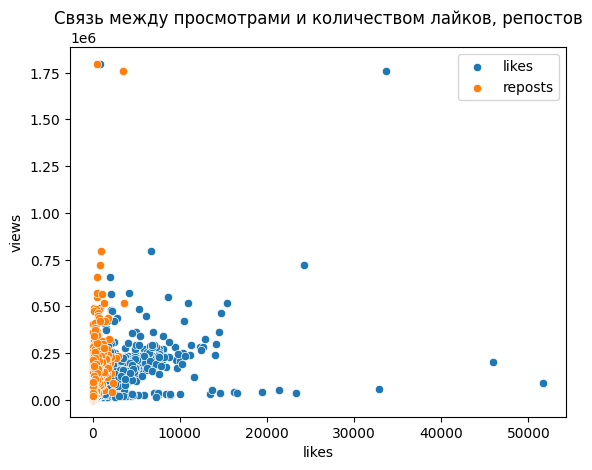

In [28]:
#seaborn
x1 = data['likes']
x2 = data['reposts']
y = data['views']

fig, ax = plt.subplots()
sns.scatterplot(x = x1, y = y, label = 'likes')
sns.scatterplot(x = x2, y = y, label = 'reposts')

plt.title('Связь между просмотрами и количеством лайков, репостов')
plt.show();

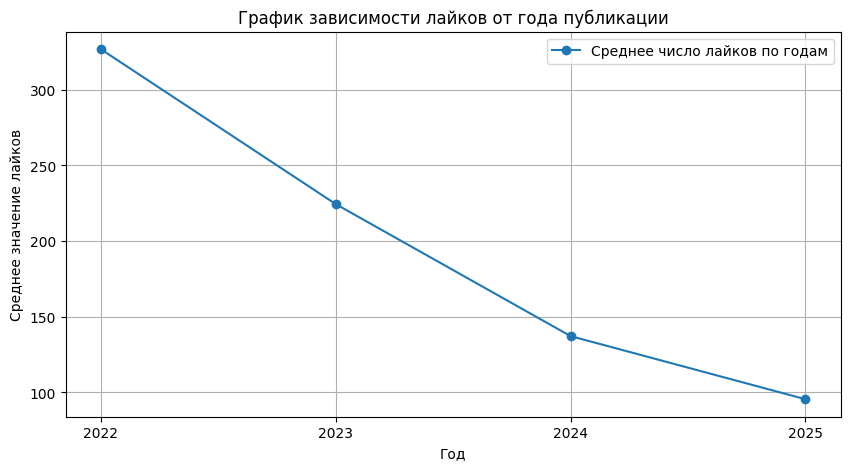

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Добавляем столбец с годом
data['year'] = data['date'].dt.year

# Группируем по годам, берем среднее значение лайков
yearly_data = data.groupby('year')['likes'].mean()

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(yearly_data.index, yearly_data.values, marker='o', linestyle='-', label="Среднее число лайков по годам")

plt.xlabel("Год")
plt.ylabel("Среднее значение лайков")
plt.title("График зависимости лайков от года публикации")
plt.xticks(yearly_data.index)  # Обозначаем все годы
plt.legend()
plt.grid()

plt.show()

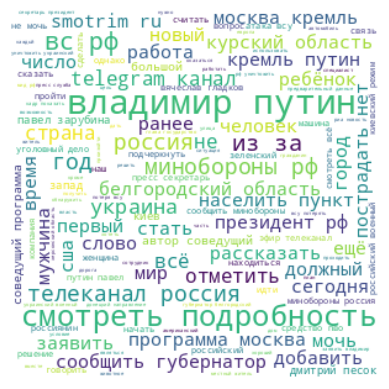

In [30]:
from wordcloud import WordCloud
text  = data['new_prep_post'].str.cat(sep=' ')

wc = WordCloud(width=300, height=300, background_color="white")
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

In [ ]:
import pandas as pd

In [41]:
data = pd.read_csv("data_preprocessed.csv")

In [42]:
data.head(10)

,Unnamed: 0,id_group,id_post,date,description,title,text,views,likes,reposts,text_without_emoji,prep_post,new_prep_post
0,0,-24136539,9329980,2025-02-27 16:52:01,NaN,NaN,"ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...",4827,47,6,"ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...","ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...",украинский спецслужба предлагать высокий возна...
1,1,-24136539,9330068,2025-02-27 18:10:00,NaN,NaN,В абхазский город Сухум прибыла первая скорост...,402,2,0,В абхазский город Сухум прибыла первая скорост...,В абхазский город Сухум прибыла первая скорост...,абхазский город сухума прибыть первый скоростн...
2,2,-24136539,9330055,2025-02-27 17:50:36,NaN,NaN,Один человек пострадал в ДТП с автоцистерной н...,3487,14,3,Один человек пострадал в ДТП с автоцистерной н...,Один человек пострадал в ДТП с автоцистерной н...,человек пострадать дтп автоцистерна трасса м-1...
3,3,-24136539,9330018,2025-02-27 17:30:00,NaN,NaN,Венгрия подняла на переговорах с США вопрос об...,3736,46,1,Венгрия подняла на переговорах с США вопрос об...,Венгрия подняла на переговорах с США вопрос об...,венгрия поднять переговоры сша вопрос отмена а...
4,4,-24136539,9329988,2025-02-27 17:02:06,NaN,NaN,"США депортировали в Россию мужчину, который со...",7529,69,5,"США депортировали в Россию мужчину, который со...","США депортировали в Россию мужчину, который со...",сша депортировать россия мужчина совершить раз...
5,5,-24136539,9329987,2025-02-27 17:00:01,NaN,NaN,"Трамп рискует, разрушая связь между европейски...",3865,15,1,"Трамп рискует, разрушая связь между европейски...","Трамп рискует, разрушая связь между европейски...",трамп рисковать разрушать связь европейский за...
6,6,-24136539,9329955,2025-02-27 16:30:04,NaN,NaN,Десятки людей пострадали в результате взрыва н...,5178,21,1,Десятки людей пострадали в результате взрыва н...,Десятки людей пострадали в результате взрыва н...,десятка человек пострадать результат взрыв вст...
7,7,-24136539,9329920,2025-02-27 15:57:58,NaN,NaN,"Не менее 10 человек пострадали после того, как...",7146,21,1,"Не менее 10 человек пострадали после того, как...","Не менее 10 человек пострадали после того, как...",не менее 10 человек пострадать машина въехать ...
8,8,-24136539,9329904,2025-02-27 15:30:00,NaN,NaN,"""Сбер"" рассматривает варианты снижения коммерч...",4770,20,4,"""Сбер"" рассматривает варианты снижения коммерч...","""Сбер"" рассматривает варианты снижения коммерч...",`` сбер '' рассматривать вариант снижение комм...
9,9,-24136539,9329873,2025-02-27 14:55:44,NaN,NaN,Видимость нулевая и снежные заносы: из-за снег...,12157,66,15,Видимость нулевая и снежные заносы: из-за снег...,Видимость нулевая и снежные заносы: из-за снег...,видимость нулевой снежный занос из-за снегопад...


In [43]:
# сразу отберем пост для валидации

dt_test = data['new_prep_post'].iloc[42000]

print(dt_test)

наследный принц саудовский аравия мухаммед бен сальман аль сауд ставить сомнение ясность ум президент сша джо байден стать известно wall street journal сообщать источник газета частный беседа принц высмеивать 79-летний президент сша оплошность оговорка признаваться байден не произвести впечатление ещё бытность вице-президент принц подчеркнуть сотрудничество предыдущий американский лидер дональд трамп нравиться большой


In [45]:
print(data.iloc[42000])

Unnamed: 0                                                        42000
id_group                                                      -24136539
id_post                                                         7199351
date                                                2022-10-25 15:05:40
description                                                         NaN
title                                                               NaN
text                  Наследный принц Саудовской Аравии Мухаммед бен...
views                                                             73455
likes                                                              1000
reposts                                                              35
text_without_emoji    Наследный принц Саудовской Аравии Мухаммед бен...
prep_post             Наследный принц Саудовской Аравии Мухаммед бен...
new_prep_post         наследный принц саудовский аравия мухаммед бен...
Name: 42000, dtype: object


In [46]:
# отберем данные для следующих шагов в новую переменную
df_d = data

### Выбор метрики и группировка данных по классам

In [47]:
# уменьшим размер выборки и уберем посты без текста
df_d = df_d.dropna(subset=['new_prep_post'])
df_d = df_d.head(5000)

In [48]:
df_d['popularity_score'] = (
    (df_d['likes'] + df_d['reposts']) / df_d['views']
)

In [49]:
print(df_d['popularity_score'].mean())

0.005848942427791379


In [50]:
# Функция для классификации
def classify_value(value):
    if value > df_d['popularity_score'].mean():
        return '1'
    else:
        return '0'

# Применение функции к столбцу
df_d['class'] = df_d['popularity_score'].apply(classify_value)

df_d.head(3)

,Unnamed: 0,id_group,id_post,date,description,title,text,views,likes,reposts,text_without_emoji,prep_post,new_prep_post,popularity_score,class
0,0,-24136539,9329980,2025-02-27 16:52:01,NaN,NaN,"ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...",4827,47,6,"ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...","ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...",украинский спецслужба предлагать высокий возна...,0.010980,1
1,1,-24136539,9330068,2025-02-27 18:10:00,NaN,NaN,В абхазский город Сухум прибыла первая скорост...,402,2,0,В абхазский город Сухум прибыла первая скорост...,В абхазский город Сухум прибыла первая скорост...,абхазский город сухума прибыть первый скоростн...,0.004975,0
2,2,-24136539,9330055,2025-02-27 17:50:36,NaN,NaN,Один человек пострадал в ДТП с автоцистерной н...,3487,14,3,Один человек пострадал в ДТП с автоцистерной н...,Один человек пострадал в ДТП с автоцистерной н...,человек пострадать дтп автоцистерна трасса м-1...,0.004875,0


In [51]:
df_d.to_csv("data_for_vector.csv")

### Векторизация

In [52]:
import pandas as pd
import numpy as np

In [53]:
df_d = pd.read_csv("data_for_vector.csv")

In [54]:
df_d

,Unnamed: 0.1,Unnamed: 0,id_group,id_post,date,description,title,text,views,likes,reposts,text_without_emoji,prep_post,new_prep_post,popularity_score,class
0,0,0,-24136539,9329980,2025-02-27 16:52:01,NaN,NaN,"ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...",4827,47,6,"ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...","ТОЛЬКО У НАС! Украинские спецслужбы, предлагая...",украинский спецслужба предлагать высокий возна...,0.010980,1
1,1,1,-24136539,9330068,2025-02-27 18:10:00,NaN,NaN,В абхазский город Сухум прибыла первая скорост...,402,2,0,В абхазский город Сухум прибыла первая скорост...,В абхазский город Сухум прибыла первая скорост...,абхазский город сухума прибыть первый скоростн...,0.004975,0
2,2,2,-24136539,9330055,2025-02-27 17:50:36,NaN,NaN,Один человек пострадал в ДТП с автоцистерной н...,3487,14,3,Один человек пострадал в ДТП с автоцистерной н...,Один человек пострадал в ДТП с автоцистерной н...,человек пострадать дтп автоцистерна трасса м-1...,0.004875,0
3,3,3,-24136539,9330018,2025-02-27 17:30:00,NaN,NaN,Венгрия подняла на переговорах с США вопрос об...,3736,46,1,Венгрия подняла на переговорах с США вопрос об...,Венгрия подняла на переговорах с США вопрос об...,венгрия поднять переговоры сша вопрос отмена а...,0.012580,1
4,4,4,-24136539,9329988,2025-02-27 17:02:06,NaN,NaN,"США депортировали в Россию мужчину, который со...",7529,69,5,"США депортировали в Россию мужчину, который со...","США депортировали в Россию мужчину, который со...",сша депортировать россия мужчина совершить раз...,0.009829,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5204,5204,-24136539,9157119,2024-11-07 10:43:52,NaN,NaN,ВСУ за сутки потеряли на курском направлении б...,11409,127,4,ВСУ за сутки потеряли на курском направлении б...,ВСУ за сутки потеряли на курском направлении б...,всу сутки потерять курский направление 150 вое...,0.011482,1
4996,5205,5205,-24136539,9157096,2024-11-07 10:30:46,NaN,NaN,⚡️ Представители России не связывались ни с ке...,14057,78,2,Представители России не связывались ни с кем...,Представители России не связывались ни с кем...,представитель россия не связываться штаб трамп...,0.005691,0
4997,5206,5206,-24136539,9157031,2024-11-07 09:48:16,NaN,NaN,"Сергей Лавров рассказал журналистам о том, гот...",14017,84,8,"Сергей Лавров рассказал журналистам о том, гот...","Сергей Лавров рассказал журналистам о том, гот...",сергей лавров рассказать журналист готовый рос...,0.006563,1
4998,5207,5207,-24136539,9157008,2024-11-07 09:32:29,NaN,NaN,⚡️ Российские войска освободили населенный пун...,20176,183,5,Российские войска освободили населенный пунк...,Российские войска освободили населенный пунк...,российский войско освободить населить пункт кр...,0.009318,1


In [55]:
!pip install gensim > None

In [56]:
import gensim.downloader as api

In [57]:
wv = api.load('word2vec-ruscorpora-300')

In [58]:
#создание списка слов без частей речи
vocab = []
for w in list(wv.index_to_key):
  vocab.append(w.split('_')[0])

In [59]:
df_vec = df_d["new_prep_post"]
df_vec

,new_prep_post
0,украинский спецслужба предлагать высокий возна...
1,абхазский город сухума прибыть первый скоростн...
2,человек пострадать дтп автоцистерна трасса м-1...
3,венгрия поднять переговоры сша вопрос отмена а...
4,сша депортировать россия мужчина совершить раз...
...,...
4995,всу сутки потерять курский направление 150 вое...
4996,представитель россия не связываться штаб трамп...
4997,сергей лавров рассказать журналист готовый рос...
4998,российский войско освободить населить пункт кр...


In [60]:
# Функция для получения среднего вектора предложения
def get_sentence_vector(sentence, vocab, wv, vector_size=300):
    words = sentence.split()
    vectors = [wv[list(wv.index_to_key)[vocab.index(word)]] if word in vocab else np.zeros(vector_size) for word in words]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

In [61]:
# Применение функции ко всему столбцу
df_df = df_vec.apply(lambda x: get_sentence_vector(x, vocab, wv))

# Вывод DataFrame с векторами
df_df

,new_prep_post
0,"[0.020362350316117366, 0.014378939977764422, -..."
1,"[0.011010641200790325, -0.005954700904205823, ..."
2,"[-0.005528557542711496, 0.011798888184130192, ..."
3,"[-0.00011831514635368397, 0.01082565557934638,..."
4,"[0.014432956010014528, 0.002754739922238514, -..."
...,...
4995,"[0.030174952183821886, 0.030550790964766886, -..."
4996,"[-0.002195864037441259, 0.015346263429488648, ..."
4997,"[0.010792651472406255, 0.02350779523840174, -0..."
4998,"[0.02795769537004192, -0.0008932440847036292, ..."


In [62]:
expanded_df = df_df.apply(pd.Series)

In [63]:
df_df.to_csv("data_in_vectors.csv")

In [64]:
expanded_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.020362,0.014379,-0.020770,0.021792,0.003674,0.024258,0.028184,0.004994,0.008413,-0.005128,...,0.034220,0.034438,-0.021225,0.012888,-0.020878,-0.024285,0.028972,0.014602,-0.043434,-0.025540
1,0.011011,-0.005955,0.006053,0.006554,0.010602,0.017559,0.031514,0.001174,-0.003522,-0.015336,...,0.008769,0.014735,-0.005048,-0.008336,-0.010186,-0.024001,-0.005348,0.006742,-0.037604,0.002180
2,-0.005529,0.011799,-0.011280,0.011275,-0.013627,-0.000959,0.025304,0.002933,0.032989,-0.012968,...,-0.026958,0.023001,-0.016580,-0.008707,0.000087,-0.001885,0.017217,0.010011,-0.052382,-0.024967
3,-0.000118,0.010826,-0.018095,0.008255,-0.011159,0.015298,-0.010109,-0.012778,0.012080,0.008019,...,0.021005,0.031362,-0.021075,-0.015148,-0.007954,-0.017656,0.033951,0.013383,-0.016088,-0.002131
4,0.014433,0.002755,-0.003293,-0.006688,-0.003304,0.006731,0.003844,-0.007014,0.025177,-0.010578,...,0.027483,0.028724,0.000813,0.006923,-0.019974,0.001679,0.021837,0.026435,-0.026789,-0.002946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.030175,0.030551,-0.030911,0.002536,-0.001135,0.029235,0.023328,0.004472,0.026528,-0.031767,...,0.003630,0.020260,-0.020370,-0.002917,-0.015504,0.003517,0.005580,0.004790,-0.027063,-0.017550
4996,-0.002196,0.015346,-0.015724,0.012418,-0.021398,0.000976,0.019930,0.004246,-0.004269,-0.004123,...,0.017693,0.040770,0.007628,-0.010289,-0.014189,-0.013837,0.035333,0.006437,-0.008844,-0.006444
4997,0.010793,0.023508,-0.029457,0.016528,-0.019942,-0.005085,0.014095,0.002435,-0.006969,-0.009283,...,0.036145,0.066042,0.018860,0.004191,-0.034901,-0.032964,0.038669,0.020311,-0.043362,-0.004143
4998,0.027958,-0.000893,-0.016487,0.018755,-0.008899,0.019668,0.024334,0.008990,0.014959,-0.022732,...,0.013834,0.022536,-0.022594,-0.010051,-0.008356,-0.004715,0.010018,0.006115,-0.029877,-0.016589


### Разделение данных на обучающую и тестовую выборку

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
# Разделение на обучающую и тестовую выборки
# X — признаки (features), y — целевая переменная (target)
X = expanded_df  # Все столбцы, кроме 'class'
y = df_d['class']  # Столбец 'class'

# Разделение данных (например, 80% обучающая, 20% тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [67]:
len(y_train), len(y_test)

(4000, 1000)

### Обучение классификаторов

#### **Logistic Regression**

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [69]:
#классификатор
clf = LogisticRegression(
        penalty = 'l2', #{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
        C = 0.2, #float, default=1.0
        class_weight = 'balanced', #dict or ‘balanced’, default=None
        random_state = 42,
        max_iter = 100, #int, default=100
        n_jobs = -1, #int, default=None
)

In [70]:
clf_pretrained = clf.fit(X_train, y_train)

In [71]:
y_predict_lin = clf_pretrained.predict(X_test)

In [72]:
y_predict_lin, len(y_predict_lin)

(array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [74]:
accuracy_score(y_test, y_predict_lin)

0.672

In [75]:
precision_score(y_test, y_predict_lin, average='macro')

0.6495659722222222

In [76]:
recall_score(y_test, y_predict_lin, average='macro')

0.6465659504244714

In [77]:
f1_score(y_test, y_predict_lin, average='macro')

0.6478253213593943

In [78]:
print(classification_report(y_test, y_predict_lin, digits = 4))

              precision    recall  f1-score   support

           0     0.7297    0.7508    0.7401       622
           1     0.5694    0.5423    0.5556       378

    accuracy                         0.6720      1000
   macro avg     0.6496    0.6466    0.6478      1000
weighted avg     0.6691    0.6720    0.6703      1000



####**SVM**

In [79]:
from sklearn.svm import LinearSVC

In [80]:
clf_lsvc = LinearSVC(
        penalty = 'l2', #{‘l1’, ‘l2’}, default=’l2’
        C = 0.2, #float, default=1.0
        class_weight = 'balanced', #dict or ‘balanced’, default=None
        random_state = 42,
        max_iter = 2000 #int, default=1000
)

In [81]:
clf_lsvc = clf_lsvc.fit(X_train, y_train)
y_predict_lsvc = clf_lsvc.predict(X_test)

In [82]:
print(classification_report(y_test, y_predict_lsvc, digits = 4))

              precision    recall  f1-score   support

           0     0.7464    0.7524    0.7494       622
           1     0.5871    0.5794    0.5832       378

    accuracy                         0.6870      1000
   macro avg     0.6668    0.6659    0.6663      1000
weighted avg     0.6862    0.6870    0.6866      1000



#### **Random Forest**

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
clf_rf =  RandomForestClassifier(
        n_estimators = 200, #int, default=100
        criterion = 'gini', #{“gini”, “entropy”, “log_loss”}, default=”gini”
        max_depth = 200, #int, default=None
        class_weight = 'balanced', #dict or ‘balanced’, default=None
        random_state = 42
)

In [85]:
clf_rf = clf_rf.fit(X_train, y_train)
y_predict_rf = clf_rf.predict(X_test)

In [86]:
print(classification_report(y_test, y_predict_rf, digits = 4))

              precision    recall  f1-score   support

           0     0.6837    0.9244    0.7861       622
           1     0.7044    0.2963    0.4171       378

    accuracy                         0.6870      1000
   macro avg     0.6941    0.6104    0.6016      1000
weighted avg     0.6915    0.6870    0.6466      1000



### Подбор гиперпараметров
На примере логистической регрессии

In [87]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [88]:
pipeline = Pipeline([('clf', LogisticRegression())])

In [89]:
#сетка параметров
parameters = {'clf__C':[1, 2, 3, 4, 5],
              'clf__penalty': ['l2'],
              'clf__solver':['liblinear', 'newton-cg']
              }

grid_search = GridSearchCV(
    estimator = pipeline,
    param_grid = parameters,
    cv = 5,
    )

In [90]:
%%time
grid_search.fit(X_train, y_train)

CPU times: user 7.04 s, sys: 3.17 s, total: 10.2 s
Wall time: 7.69 s


GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', LogisticRegression())]),
             param_grid={'clf__C': [1, 2, 3, 4, 5], 'clf__penalty': ['l2'],
                         'clf__solver': ['liblinear', 'newton-cg']})

In [91]:
#лучшие параметры классификатора
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print(f'{param_name}: {best_parameters[param_name]}')

clf__C: 5
clf__penalty: l2
clf__solver: liblinear


In [92]:
#тестирование
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.7169    0.8875    0.7931       622
           1     0.6957    0.4233    0.5263       378

    accuracy                         0.7120      1000
   macro avg     0.7063    0.6554    0.6597      1000
weighted avg     0.7089    0.7120    0.6923      1000



### Предсказание популярности нового поста


In [93]:
Db = 'наследный принц саудовский аравия мухаммед бен сальман аль сауд ставить сомнение ясность ум президент сша джо байден стать известно wall street journal сообщать источник газета частный беседа принц высмеивать 79-летний президент сша оплошность оговорка признаваться байден не произвести впечатление ещё бытность вице-президент принц подчеркнуть сотрудничество предыдущий американский лидер дональд трамп нравиться большой'

In [94]:
# Применение функции ко всему столбцу
df_check = get_sentence_vector(Db, vocab, wv)

# Вывод DataFrame с векторами
df_check

array([-2.04130349e-06,  1.19203051e-02, -7.88862534e-03,  2.65970301e-02,
       -2.47117498e-02, -5.91176679e-03,  1.19957886e-03,  1.44219903e-02,
        8.42966838e-04, -2.48252006e-02,  1.25233831e-02, -2.72094238e-02,
       -8.07066301e-03, -1.41545335e-02,  2.30941789e-02, -1.42148473e-03,
        5.14041859e-02,  1.92445951e-04,  2.42237190e-02,  5.29306990e-03,
        2.17049030e-02,  1.39352324e-02, -3.47450472e-02,  1.47261476e-02,
        2.13249223e-02,  8.77332891e-03,  2.80916254e-02, -3.35682923e-03,
        8.58254019e-03, -2.81284742e-03,  2.47045149e-02,  1.45154455e-02,
        3.06537355e-02, -1.00995861e-02,  4.56970955e-02, -5.80804764e-03,
        1.42100122e-02,  1.09326628e-02, -2.84892113e-02,  2.96668944e-02,
        1.69916453e-02,  3.10206631e-04,  2.12885186e-02,  1.54915880e-02,
       -9.36293973e-03,  1.20981373e-02, -4.35317744e-04,  7.53882942e-03,
        8.71768601e-03, -1.19154493e-02, -1.23178164e-02, -2.44164441e-02,
       -1.09717034e-02,  

In [95]:
len(df_check)

300

In [96]:
pd_check = pd.DataFrame(df_check)
pd_check.T

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.000002,0.01192,-0.007889,0.026597,-0.024712,-0.005912,0.0012,0.014422,0.000843,-0.024825,...,0.017204,0.047501,0.015266,-0.008605,-0.011832,-0.03041,0.02515,0.018625,-0.014488,0.008988


In [97]:
y_predict_rf = clf_rf.predict(pd_check.T)

In [98]:
y_predict_rf # пост оказался непопулярным, судя по предсказанию модели

array([0])